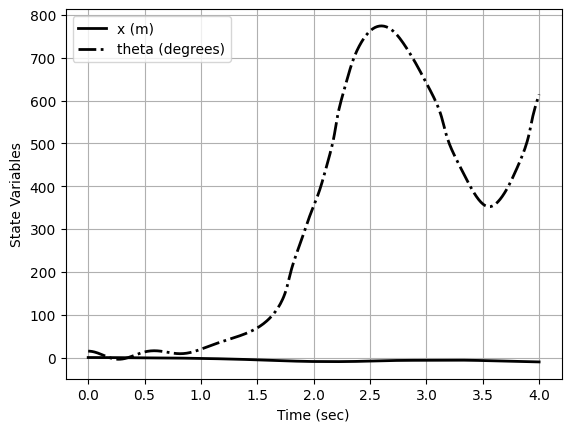

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def inverted_pendulum_k1(t, x):
    # Parameters (you may need to adjust these according to your system)
    m = 0.5  # Mass of the cart
    M = 0.2  # Mass of the pendulum
    L = 0.3  # Length of the pendulum
    g = 9.81  # Acceleration due to gravity
    k1 = 0.5  # Some parameter for the dynamics

    # State variables
    dxdt = np.zeros_like(x)
    dxdt[0] = x[1]
    dxdt[1] = (1/(m + M - m*np.cos(x[2])**2)) * (k1*x[3] - m*L*x[3]**2*np.sin(x[2])*np.cos(x[2]) - (m + M)*g*np.sin(x[2]))
    dxdt[2] = x[3]
    dxdt[3] = (1/(L*(m + M - m*np.cos(x[2])**2))) * ((m*L*x[3]**2*np.sin(x[2])*np.cos(x[2]) - (m + M)*g*np.sin(x[2]))*np.cos(x[2]) - k1*x[1])

    return dxdt

# Initial conditions
x0 = [0, 0, 0.26, 0]  # [x (m), dx/dt (m/s), theta (rad), dtheta/dt (rad/s)]

# Time span
tspan = (0, 4)

# Solve the ODE
sol = solve_ivp(inverted_pendulum_k1, tspan, x0, method='RK45', max_step=1e-2)

# Plot the results
plt.figure()
plt.plot(sol.t, sol.y[0], 'k', label='x (m)', linewidth=2)
plt.plot(sol.t, sol.y[2] * 180 / np.pi, '-.k', label='theta (degrees)', linewidth=2)
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State Variables')
plt.legend()
plt.show()
